In [3]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Galan\AppData\Local\Temp\ipykernel_21308\2250977813.py:1: SyntaxWarning: invalid escape sequence '\G'
  img = cv2.imread("D:\Galan\Semester 5\Pengolahan Data Tidak Terstruktur\Latihan\dog.4053.jpg") # Adjust the path as necessary


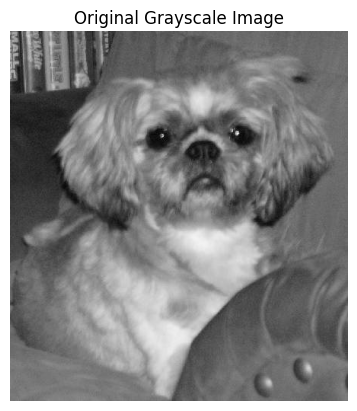

In [4]:
img = cv2.imread("D:\Galan\Semester 5\Pengolahan Data Tidak Terstruktur\Latihan\dog.4053.jpg") # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [3]:
# Create a function to display images
def show_image(image, title="Image"):
	plt.imshow(image, cmap='gray')
	plt.title(title)
	plt.axis('off')
	plt.show()

## Point Operations

Point operations adalah teknik dasar dalam pengolahan citra digital yang melibatkan manipulasi nilai intensitas piksel secara individual tanpa mempertimbangkan piksel tetangga. Operasi ini sering digunakan untuk meningkatkan kualitas citra, menyesuaikan kecerahan dan kontras, serta menerapkan efek khusus. Berikut adalah beberapa operasi titik umum yang sering digunakan dalam pengolahan citra:
1. Brightness Adjustment
2. Contrast Adjustment
3. Negative / Inversion
4. Thresholding
5. Gamma Correction

### 1. Brightness Adjustment
**Konsep:**
Brightness adjustment adalah operasi point yang menambahkan atau mengurangi nilai konstanta pada setiap piksel dalam citra. Operasi ini menggeser histogram ke kanan (lebih terang) atau ke kiri (lebih gelap) tanpa mengubah bentuk distribusinya.

**Implementasi:**
```python
bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)
dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)
```

**Parameter:**
- `alpha=1.0`: Faktor skala tetap (tidak mengubah kontras)
- `beta=50`: Menambahkan 50 pada setiap nilai piksel (mencerahkan)
- `beta=-50`: Mengurangi 50 dari setiap nilai piksel (menggelapkan)

**Formula Matematis:**
```
Output = Input + beta
Brightened = I(x,y) + 50
Darkened = I(x,y) - 50
```

**Catatan:** Fungsi `convertScaleAbs()` secara otomatis memastikan nilai tetap dalam rentang [0, 255] dengan clipping.

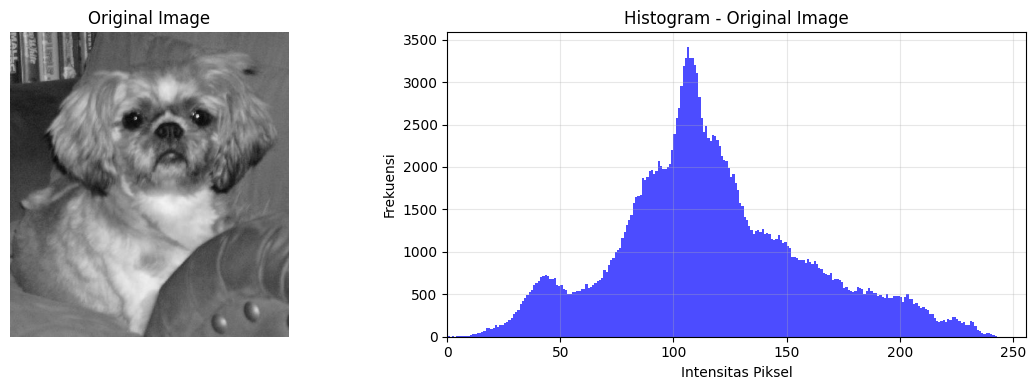

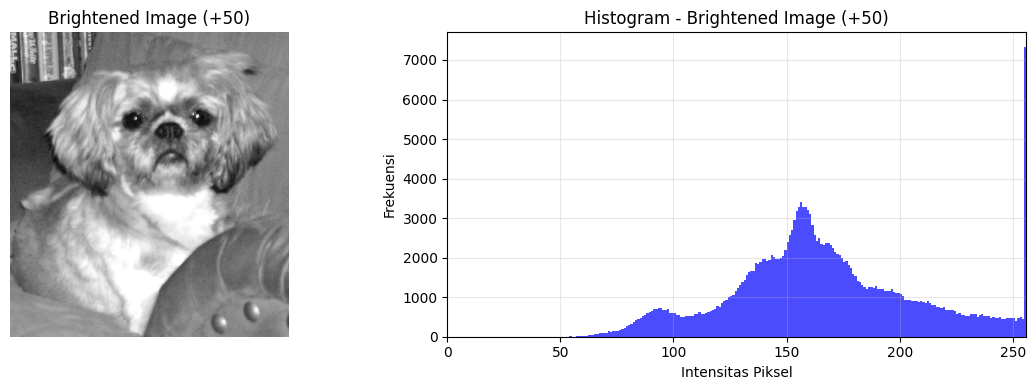

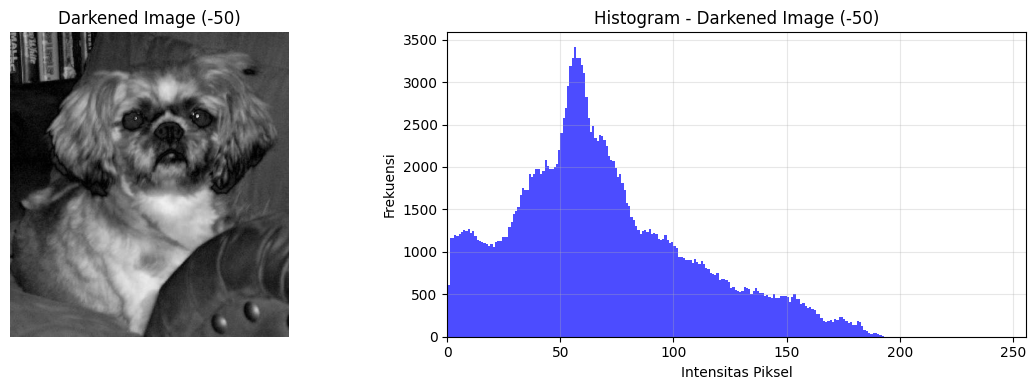

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_histogram(img, title):
    """Menampilkan gambar beserta histogramnya"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Tampilkan gambar
    ax1.imshow(img, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')
    
    # Tampilkan histogram
    ax2.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    ax2.set_title(f'Histogram - {title}')
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Contoh penggunaan
# Asumsikan img_gray sudah ada
bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)
dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)

# Tampilkan gambar asli dengan histogram
show_image_with_histogram(img_gray, "Original Image")

# Tampilkan gambar brightened dengan histogram
show_image_with_histogram(bright, "Brightened Image (+50)")

# Tampilkan gambar darkened dengan histogram
show_image_with_histogram(dark, "Darkened Image (-50)")

# Analisis Histogram pada Brightness Adjustment

## Pendahuluan
Ketika kita mengubah kecerahan gambar dengan menambah atau mengurangi nilai konstan, perubahan yang terjadi bisa dilihat dengan jelas melalui histogram. Histogram ini pada dasarnya menunjukkan seberapa banyak piksel dengan intensitas tertentu dalam gambar.

## Hasil Pengamatan pada Gambar Original

Dari histogram gambar original, bisa dilihat bagaimana distribusi intensitas pikselnya. Biasanya gambar yang bagus punya sebaran yang cukup merata, tidak terlalu menumpuk di satu area saja. Kalau histogramnya terlalu ke kiri, berarti gambarnya cenderung gelap. Kalau terlalu ke kanan, berarti terlalu terang.

## Yang Terjadi pada Brightened Image (+50)

Pas gambar ditambah 50 unit brightness, yang terjadi cukup menarik:

**Pergeseran histogram ke kanan**  
Seluruh histogram bergeser 50 unit ke kanan. Ini masuk akal karena semua piksel ditambah 50. Misalnya piksel yang tadinya punya nilai 100 jadi 150, yang 150 jadi 200, dan seterusnya.

**Masalah clipping**  
Nah, ini yang jadi masalah. Piksel yang nilai originalnya di atas 205 akan "mentok" di 255 (putih maksimal). Jadi kalau original-nya 210, harusnya jadi 260 tapi karena maksimalnya cuma 255, ya jadi 255. Begitu juga yang 220, 230, 240 - semuanya jadi 255. Akibatnya detail di area terang hilang dan jadi flat putih.

Di histogram, ini keliatan dari "spike" atau lonjakan di ujung kanan (nilai 255). Semakin banyak piksel yang ter-clipping, semakin tinggi spike-nya.

**Dampak ke gambar**  
- Area gelap jadi lebih keliatan detailnya
- Tapi area yang udah terang malah jadi overexposed dan kehilangan detail
- Gambar keseluruhan memang lebih terang, tapi ada trade-off berupa kehilangan informasi di highlight

## Yang Terjadi pada Darkened Image (-50)

Sebaliknya, pas dikurangi 50:

**Pergeseran histogram ke kiri**  
Histogram bergeser 50 unit ke kiri. Piksel yang tadinya 100 jadi 50, yang 150 jadi 100, dan seterusnya.

**Clipping di sisi gelap**  
Masalah yang sama terjadi, tapi di sisi sebaliknya. Piksel dengan nilai di bawah 50 akan "mentok" di 0 (hitam). Piksel yang originalnya 30, 20, 10 - semuanya jadi 0 (hitam pekat). Detail di area gelap (shadow) jadi hilang.

Spike di histogram muncul di ujung kiri (nilai 0), menandakan banyak piksel yang ter-clipping ke hitam.

**Dampak ke gambar**  
- Area terang masih oke, detailnya tetap terjaga
- Tapi shadow jadi "crushed" - semua jadi hitam pekat tanpa detail
- Gambar jadi underexposed di area gelap

## Perbandingan

Kalau kita lihat ketiga histogram bersamaan, pola yang muncul cukup jelas:

1. Bentuk dasar histogramnya sama, cuma posisinya aja yang beda
2. Lebar distribusinya tetap sama, artinya kontras relatif masih sama (kecuali di area yang ter-clipping)
3. Darkened paling kiri, original di tengah, brightened paling kanan

Yang penting untuk diperhatikan adalah **area clipping**. Kalau spike di ujung histogram terlalu tinggi, berarti banyak detail yang hilang.


## Kesimpulan

Brightness adjustment dengan konstanta memang gampang, tapi punya keterbatasan besar. Metode ini "buta" - tidak peduli apakah suatu area sudah terang atau masih gelap, semua diperlakukan sama. Akibatnya sering terjadi clipping yang menghilangkan detail.

Untuk koreksi sederhana dengan perubahan kecil (sekitar ±20-30), metode ini masih oke. Tapi kalau mau hasil yang lebih baik, terutama untuk gambar dengan dynamic range tinggi, lebih baik pakai metode yang lebih adaptif.

Yang paling penting: selalu perhatikan histogram. Histogram tidak bohong - dia menunjukkan dengan jelas apa yang terjadi pada gambar kita. Kalau lihat spike di ujung histogram, itu warning sign bahwa ada detail yang hilang.

### 2. Contrast Adjustment
**Konsep:**
Contrast adjustment mengubah rentang intensitas piksel dengan mengalikan nilai piksel dengan faktor skala (alpha). Nilai kontras yang tinggi memperbesar perbedaan antara area terang dan gelap, sedangkan nilai yang rendah mengurangi perbedaan tersebut.

**Implementasi:**
```python
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
```

**Parameter:**
- **Low Contrast**: `alpha=0.5, beta=128`
  - Mengurangi rentang intensitas menjadi setengahnya
  - Beta=128 untuk mempertahankan nilai tengah agar tidak terlalu gelap
  
- **Normal Contrast**: `alpha=1.0, beta=0`
  - Mempertahankan citra asli tanpa perubahan
  
- **High Contrast**: `alpha=1.5, beta=0`
  - Memperluas rentang intensitas 1.5x lipat
  - Memperjelas detail dan tepi objek

**Formula Matematis:**
```
Output = alpha × Input + beta
Low: I'(x,y) = 0.5 × I(x,y) + 128
High: I'(x,y) = 1.5 × I(x,y)
```

**Efek pada Histogram:**
- Low contrast: Histogram menyempit dan terpusat
- High contrast: Histogram melebar ke arah ekstrem (0 dan 255)

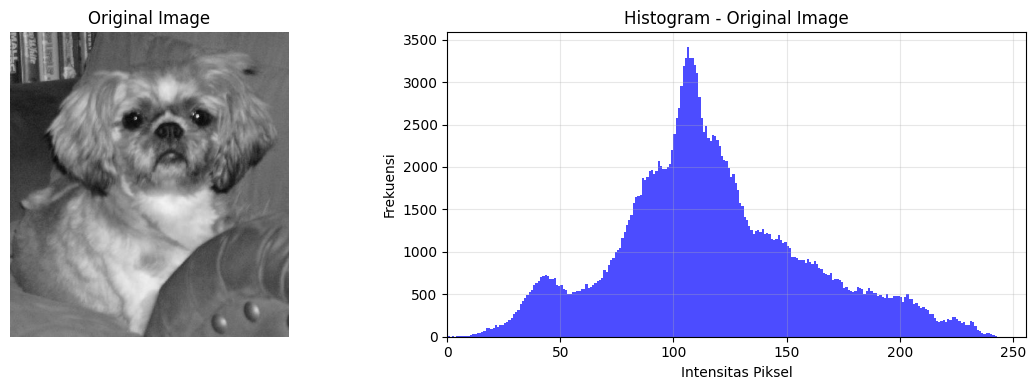

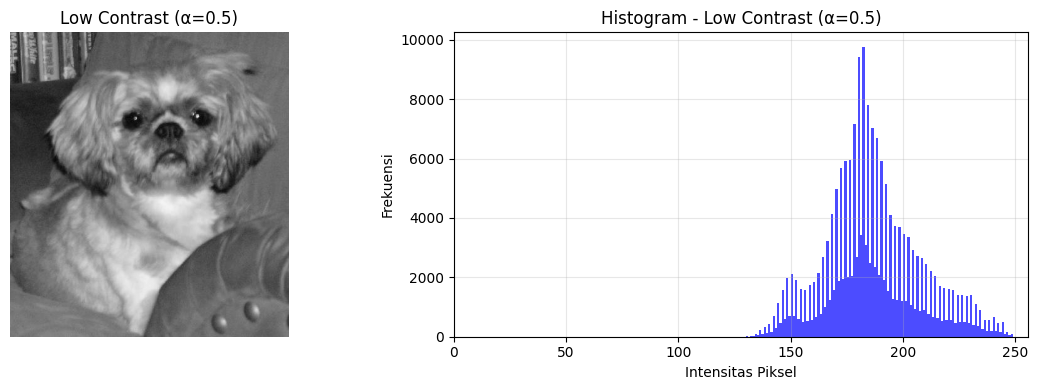

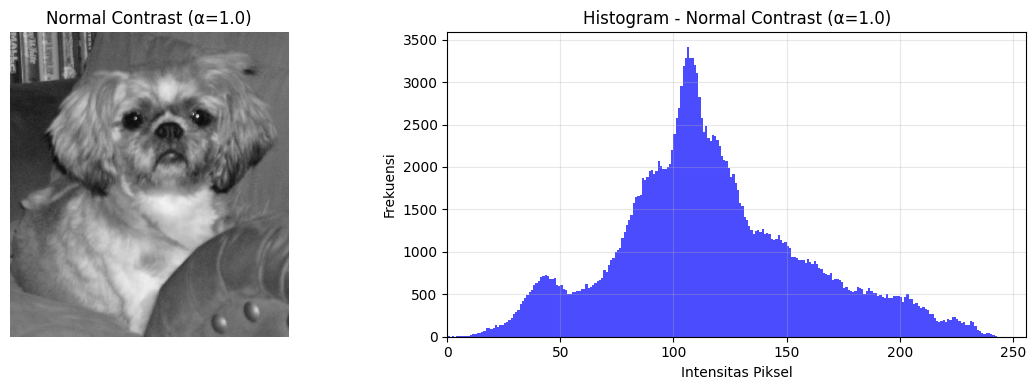

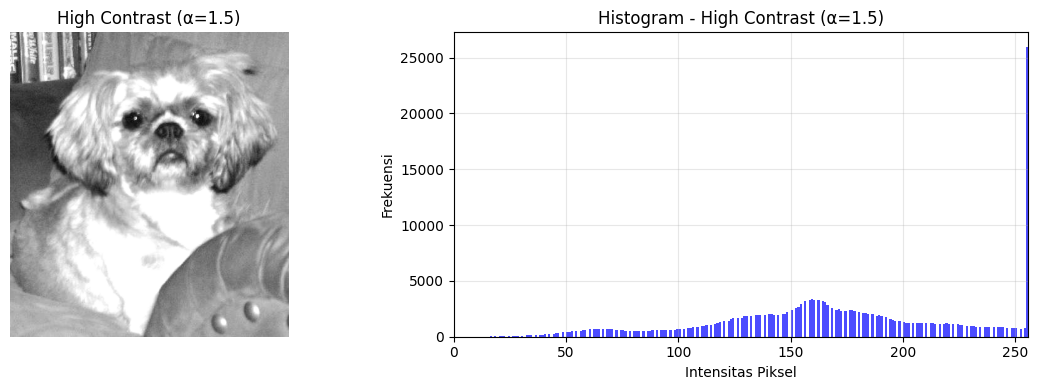

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_histogram(img, title):
    """Menampilkan gambar beserta histogramnya"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Tampilkan gambar
    ax1.imshow(img, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')
    
    # Tampilkan histogram
    ax2.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    ax2.set_title(f'Histogram - {title}')
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Contrast adjustment
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)

# Tampilkan masing-masing dengan histogram
show_image_with_histogram(img_gray, "Original Image")
show_image_with_histogram(low_contrast, "Low Contrast (α=0.5)")
show_image_with_histogram(normal_contrast, "Normal Contrast (α=1.0)")
show_image_with_histogram(high_contrast, "High Contrast (α=1.5)")

# Analisis Histogram pada Contrast Adjustment

## Pendahuluan

Berbeda dengan brightness adjustment yang menggeser histogram, contrast adjustment mengubah "lebar" atau sebaran histogram. Parameter alpha (α) dalam fungsi `convertScaleAbs` mengontrol kontras dengan cara mengalikan setiap nilai piksel. Hasilnya bisa dilihat dengan jelas lewat perubahan bentuk histogram.

## Memahami Formula Dasar

Sebelum masuk ke analisis, penting untuk paham dulu formula yang dipakai:
```
Piksel_baru = α × Piksel_original + β
```

- **α (alpha)**: Faktor pengali kontras
  - α < 1: Kontras menurun
  - α = 1: Kontras tetap
  - α > 1: Kontras meningkat
  
- **β (beta)**: Offset brightness (dalam kasus ini fokus ke kontras, jadi beta divariasikan)

## Analisis Low Contrast (α=0.5, β=128)

**Yang Terjadi Secara Matematis**

Dengan α=0.5, setiap piksel dikalikan 0.5 lalu ditambah 128. Misalnya:
- Piksel hitam (0): 0 × 0.5 + 128 = 128
- Piksel abu tengah (128): 128 × 0.5 + 128 = 192
- Piksel putih (255): 255 × 0.5 + 128 = 255.5 ≈ 255

**Karakteristik Histogram**

Histogram low contrast punya ciri khas yang sangat kentara:

1. **Penyempitan distribusi**: Histogram yang tadinya lebar jadi menyempit dan menumpuk di tengah
2. **Kehilangan range dinamis**: Rentang nilai piksel berkurang drastis - kalau original punya range 0-255, setelah low contrast mungkin cuma 128-255
3. **Puncak yang lebih tinggi**: Karena nilai-nilai piksel jadi lebih mirip satu sama lain, frekuensi di area tertentu meningkat

**Efek Visual**

Gambar jadi terlihat "washed out" atau pucat. Kenapa? Karena perbedaan antara area gelap dan terang berkurang. Bayangkan foto landscape - kalau kontrasnya rendah, langit dan tanah jadi punya intensitas yang mirip-mirip, sehingga gambar terlihat datar dan kurang dimensi.

Detail masih ada, tapi jadi susah dilihat karena perbedaan intensitasnya terlalu kecil. Ini seperti melihat sesuatu dalam kabut - objeknya ada, tapi tidak jelas karena perbedaan kontrasnya rendah.

**Kapan Low Contrast Berguna?**

Meskipun terdengar jelek, low contrast sebenarnya ada kegunaannya:
- Untuk gambar yang akan di-composite atau dijadikan background
- Mengurangi noise dengan "meratakan" intensitas
- Efek artistic tertentu (misalnya efek dreamy atau vintage)

## Analisis Normal Contrast (α=1.0, β=0)

Ini straightforward - tidak ada perubahan sama sekali. Histogram tetap sama dengan original karena:
```
Piksel_baru = 1.0 × Piksel_original + 0 = Piksel_original
```

Ini baseline untuk perbandingan. Semua perubahan di low contrast dan high contrast bisa dibandingkan dengan kondisi ini.

## Analisis High Contrast (α=1.5, β=0)

**Yang Terjadi Secara Matematis**

Dengan α=1.5, setiap piksel dikalikan 1.5. Contoh:
- Piksel gelap (50): 50 × 1.5 = 75
- Piksel tengah (128): 128 × 1.5 = 192
- Piksel terang (200): 200 × 1.5 = 300 → clipping ke 255

**Karakteristik Histogram**

High contrast punya pola yang menarik:

1. **Peregangan distribusi**: Histogram melebar - nilai yang tadinya berdekatan jadi lebih berjauhan
2. **Clipping di kedua ujung**: Ini masalah utamanya
   - Nilai gelap yang dikali 1.5 bisa jadi negatif → clipping ke 0
   - Nilai terang yang dikali 1.5 bisa melebihi 255 → clipping ke 255
3. **Spike di ujung histogram**: Ada lonjakan di nilai 0 dan 255, menandakan banyak piksel yang ter-clipping
4. **Gap atau celah**: Kadang muncul celah dalam histogram karena nilai-nilai tertentu "loncat" saat dikalikan

**Efek Visual**

Gambar jadi lebih "punchy" - perbedaan antara gelap dan terang lebih ekstrem. Warna hitam jadi lebih hitam, putih lebih putih. Ini membuat gambar terlihat lebih dramatis dan detail lebih menonjol.

Tapi ada harganya - detail di area paling gelap (shadow) dan paling terang (highlight) hilang karena clipping. Semua yang tadinya abu gelap (misalnya nilai 0-50) jadi hitam pekat semua. Semua yang tadinya abu terang (misalnya 200-255) jadi putih sempurna.

**Masalah Clipping**

Clipping di high contrast lebih parah daripada brightness adjustment. Kenapa? Karena:
- Dengan brightness, cuma satu ujung yang kena clipping
- Dengan high contrast, KEDUA ujung bisa kena
- Semakin tinggi alpha, semakin banyak piksel yang ter-clipping

Di histogram, ini terlihat jelas dari spike yang tinggi di nilai 0 dan 255. Kalau spike-nya sangat tinggi, berarti banyak detail yang hilang.

## Perbandingan Ketiga Histogram

Kalau kita overlay ketiga histogram, pola yang muncul sangat informatif:

**Bentuk Dasar**
- Low contrast: Histogram sempit, menumpuk di tengah
- Normal contrast: Histogram dengan lebar "normal"
- High contrast: Histogram lebar, menyebar ke ujung-ujung

**Posisi Mean (Rata-rata)**
Menariknya, mean atau rata-rata intensitas bisa berubah tergantung beta:
- Low contrast dengan β=128: Mean bergeser ke kanan (lebih terang)
- High contrast dengan β=0: Mean bisa bergeser tergantung distribusi original

**Standard Deviation**
Ini metrik penting untuk kontras:
- Low contrast: StdDev kecil (nilai-nilai piksel mirip semua)
- High contrast: StdDev besar (nilai-nilai piksel tersebar luas)

Standard deviation pada dasarnya mengukur kontras. Semakin besar StdDev, semakin tinggi kontras.


## Kesimpulan

Contrast adjustment dengan alpha multiplier adalah teknik yang powerful tapi harus hati-hati. Dari analisis histogram, kita bisa lihat jelas trade-off-nya:

**Low Contrast (α < 1)**
- ✓ Aman, tidak ada clipping
- ✓ Cocok untuk preprocessing atau efek tertentu
- ✗ Gambar jadi flat dan kurang menarik
- ✗ Detail susah dilihat

**High Contrast (α > 1)**
- ✓ Gambar lebih dramatis dan menarik
- ✓ Detail lebih menonjol
- ✗ Clipping di kedua ujung histogram
- ✗ Kehilangan detail di shadow dan highlight

**Tips Praktis:**
1. Selalu cek histogram sebelum dan sesudah adjustment
2. Kalau mau increase contrast, mulai dari alpha kecil (misalnya 1.2) dan naikkan bertahap
3. Perhatikan spike di ujung histogram - itu warning sign
4. Untuk gambar penting, pertimbangkan metode yang lebih sophisticated seperti CLAHE
5. Kadang kombinasi alpha < 1 dengan beta > 0 bisa lebih efektif daripada alpha > 1

Intinya, histogram adalah tools diagnostik yang tidak bisa diabaikan. Dengan memahami bentuk histogram, kita bisa prediksi hasil adjustment sebelum melihat gambarnya - dan itu skill yang sangat berguna dalam image processing.

### 3. Negative / Inversion

**Konsep:**
Image inversion menciptakan efek negatif fotografis dengan membalik nilai intensitas setiap piksel. Piksel gelap menjadi terang dan sebaliknya. Operasi ini berguna untuk analisis medis (X-ray) atau efek artistik.

**Implementasi:**
```python
negative = 255 - img_gray
```

**Formula Matematis:**
```
Output = MAX_VALUE - Input
I'(x,y) = 255 - I(x,y)
```

**Contoh Transformasi:**
- Piksel dengan nilai 0 (hitam) → 255 (putih)
- Piksel dengan nilai 255 (putih) → 0 (hitam)
- Piksel dengan nilai 128 (abu-abu) → 127 (abu-abu)

**Karakteristik:**
- Operasi sederhana dan cepat (hanya subtraksi)
- Tidak mengubah informasi struktural citra
- Histogram terbalik (mirror) terhadap nilai tengah (127.5)

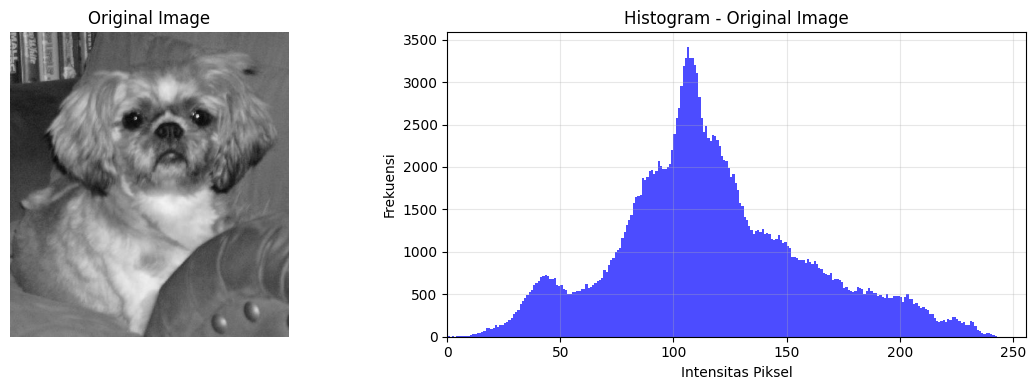

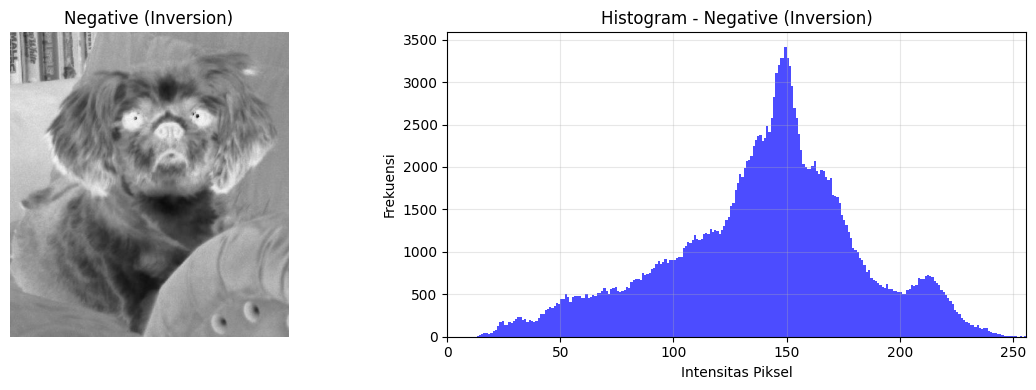

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_histogram(img, title):
    """Menampilkan gambar beserta histogramnya"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Tampilkan gambar
    ax1.imshow(img, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')
    
    # Tampilkan histogram
    ax2.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    ax2.set_title(f'Histogram - {title}')
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Negative/Inversion
negative = 255 - img_gray

# Tampilkan original dan negative dengan histogram
show_image_with_histogram(img_gray, "Original Image")
show_image_with_histogram(negative, "Negative (Inversion)")

# Analisis Histogram pada Image Inversion (Negative)

## Apa Itu Image Inversion?

Image inversion atau negative adalah proses membalik intensitas piksel dalam gambar. Formula-nya sangat sederhana:
```
Piksel_baru = 255 - Piksel_original
```

Yang tadinya hitam jadi putih, yang putih jadi hitam. Seperti foto negatif di jaman film dulu.

## Yang Terjadi pada Histogram

**Efek Mirroring (Cerminan)**

Hal paling menarik dari histogram negative adalah bentuknya yang merupakan cerminan sempurna dari histogram original. Bayangkan kamu punya gunung, terus kamu lihat bayangannya di air - itulah yang terjadi pada histogram.

Contoh sederhana:
- Kalau di original banyak piksel dengan nilai 50, di negative akan banyak piksel dengan nilai 205 (255-50)
- Kalau di original ada puncak histogram di 200, di negative akan ada puncak di 55 (255-200)
- Kalau original punya lembah di 100, negative punya lembah di 155 (255-100)

Jadi histogram-nya flip atau terbalik sempurna terhadap garis tengah (di sekitar 127-128).

**Kenapa Ini Terjadi?**

Karena setiap piksel dengan nilai tertentu akan berubah menjadi 255 dikurangi nilai tersebut. Jumlah pikselnya tetap sama, cuma posisinya di histogram yang berpindah ke sisi seberang.

## Perubahan pada Nilai Statistik

**Mean (Rata-rata)**

Ada hubungan matematika yang menarik:
```
Mean Original + Mean Negative = 255
```

Contoh:
- Kalau mean gambar original = 100, mean gambar negative = 155
- Kalau mean original = 80, mean negative = 175
- Selalu total 255!

Ini artinya kalau gambar original cenderung gelap, gambar negative akan cenderung terang, dan sebaliknya.

**Standard Deviation (Kontras)**

Yang mengejutkan: standard deviation TIDAK BERUBAH!
```
StdDev Original = StdDev Negative
```

Artinya kontras gambar tetap sama. Inversion cuma membalik terang-gelap, tapi tidak mengubah seberapa "kontras" gambar tersebut. Gambar yang kontrasnya tinggi akan tetap high contrast setelah di-negative.

**Range (Rentang)**

Range nilai piksel juga tetap sama. Kalau original pakai range 50-200 (total 150 unit), negative akan pakai range 55-205 (juga 150 unit). Ujung-ujungnya bertukar tempat tapi panjangnya sama.

## Karakteristik Khusus Inversion

**1. Bisa Balik ke Original**

Kalau kamu negative gambar dua kali, kamu dapat gambar original kembali:
```
255 - (255 - x) = x
```

Ini seperti cermin ganda - bayangan dari bayangan adalah objek aslinya. Tidak banyak operasi image processing yang punya sifat ini.

**2. Tidak Ada Informasi yang Hilang**

Berbeda dengan operasi lain (seperti brightness atau contrast adjustment), inversion tidak pernah menghilangkan informasi. Tidak ada clipping, tidak ada detail yang hilang. Semua informasi di gambar original tetap ada di gambar negative, cuma "warnanya" aja yang dibalik.

**3. Titik Tengah Tetap**

Piksel dengan nilai sekitar 127-128 (abu-abu tengah) hampir tidak berubah:
- 127 → 128
- 128 → 127

Jadi piksel abu-abu tengah tetap abu-abu tengah.

## Kapan Inversion Berguna?

**Medical Imaging**

Di X-ray atau foto rontgen, kadang dokter lebih mudah melihat detail tertentu kalau gambarnya di-negative. Tulang yang biasanya putih jadi hitam, dan kadang kelainan lebih mudah terlihat.

**Document Processing**

Kalau punya dokumen dengan tulisan putih di background hitam, bisa di-negative jadi tulisan hitam di background putih. Ini lebih mudah untuk dibaca atau di-scan dengan OCR.

**Melihat dari Perspektif Berbeda**

Kadang masalah di gambar lebih keliatan kalau dilihat dari "sisi sebaliknya". Histogram negative membantu kita menganalisis distribusi intensitas dari sudut pandang yang berbeda.


## Yang Perlu Diingat

**Inversion BUKAN untuk:**
- Memperbaiki gambar yang terlalu gelap/terang (tidak menambah informasi)
- Meningkatkan kontras (kontras tidak berubah)
- Brightness adjustment (ada cara lebih langsung)

**Inversion BAGUS untuk:**
- Analisis medis
- Preprocessing untuk OCR
- Melihat gambar dari perspektif berbeda
- Efek artistik
- Operasi yang butuh reversible transformation

## Kesimpulan Sederhana

Image inversion adalah operasi yang sangat simple tapi punya properti matematika yang menarik:

1. Histogram negative adalah cerminan histogram original
2. Mean original + mean negative selalu = 255
3. Kontras (standard deviation) tidak berubah
4. Tidak ada informasi yang hilang
5. Bisa di-reverse dengan cara yang sama

Kalau dilihat dari histogram, inversion cuma "membalik" distribusi intensitas. Yang tadinya di kiri pindah ke kanan, yang di kanan pindah ke kiri. Tapi bentuk dan karakteristik distribusinya tetap sama - cuma posisinya aja yang kebalik.

Ini membuat inversion sangat berguna untuk analisis dan preprocessing, meskipun bukan untuk "memperbaiki" gambar dalam artian menambah detail atau informasi baru.

### 4. Thresholding
**Konsep:**
Thresholding mengubah citra grayscale menjadi citra biner (hitam-putih) berdasarkan nilai ambang (threshold). Piksel dengan intensitas di atas threshold menjadi putih (255), dan di bawahnya menjadi hitam (0).

**Implementasi:**
```python
_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
```

**Parameter:**
- `img_gray`: Citra grayscale input
- `128`: Nilai threshold (ambang batas)
- `255`: Nilai maksimum untuk piksel di atas threshold
- `cv2.THRESH_BINARY`: Jenis thresholding biner

**Formula Matematis:**
```
I'(x,y) = { 255  if I(x,y) > 128
          { 0    if I(x,y) ≤ 128
```

**Kegunaan:**
- Segmentasi objek dari latar belakang
- Deteksi tepi dan kontur
- Preprocessing untuk OCR (Optical Character Recognition)
- Analisis citra biner

**Return Value:**
- Nilai pertama (`_`): Threshold value yang digunakan (diabaikan dalam kasus ini)
- `binary`: Citra biner hasil thresholding

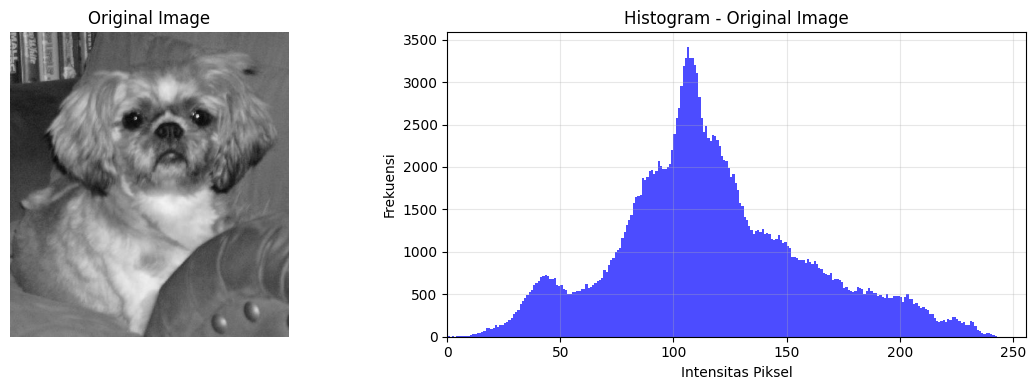

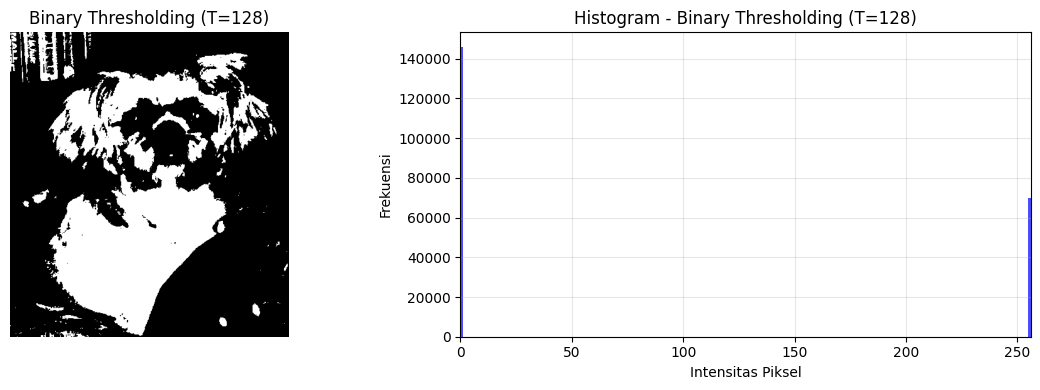

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_histogram(img, title):
    """Menampilkan gambar beserta histogramnya"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Tampilkan gambar
    ax1.imshow(img, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')
    
    # Tampilkan histogram
    ax2.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    ax2.set_title(f'Histogram - {title}')
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Binary Thresholding
_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

# Tampilkan original dan binary dengan histogram
show_image_with_histogram(img_gray, "Original Image")
show_image_with_histogram(binary, "Binary Thresholding (T=128)")

# Analisis Histogram pada Binary Thresholding

## Apa Itu Binary Thresholding?

Binary thresholding adalah proses mengubah gambar grayscale menjadi gambar hitam-putih saja. Tidak ada abu-abu, hanya dua warna: hitam (0) atau putih (255).

Formula-nya simpel:
```
Jika piksel < threshold → jadi 0 (hitam)
Jika piksel ≥ threshold → jadi 255 (putih)
```

Dalam contoh kita, threshold = 128, jadi:
- Semua piksel dengan nilai 0-127 → jadi 0
- Semua piksel dengan nilai 128-255 → jadi 255

## Perubahan Drastis pada Histogram

**Histogram Original vs Binary**

Perbedaan paling mencolok antara histogram original dan binary:

**Histogram Original:**
- Punya banyak nilai (bisa sampai 256 nilai berbeda)
- Bentuknya bisa seperti gunung, lembah, atau distribusi lainnya
- Setiap bar di histogram bisa punya tinggi yang berbeda-beda
- Menunjukkan gradasi abu-abu yang halus

**Histogram Binary:**
- HANYA punya 2 nilai: 0 dan 255
- Histogram cuma punya 2 spike (batang) yang tinggi
- Tidak ada apa-apa di tengah (semua nilai 1-254 hilang total)
- Seperti "all or nothing" - hitam atau putih, tidak ada abu-abu

## Memahami Dua Spike di Histogram Binary

**Spike di Nilai 0 (Hitam)**

Tinggi spike ini menunjukkan berapa banyak piksel yang nilai original-nya di bawah threshold (128). Semua piksel ini sekarang jadi hitam sempurna.

Contoh: Kalau spike di 0 sangat tinggi, berarti banyak piksel original yang gelap (< 128), dan sekarang semua jadi hitam.

**Spike di Nilai 255 (Putih)**

Tinggi spike ini menunjukkan berapa banyak piksel yang nilai original-nya sama atau di atas threshold (128). Semua piksel ini sekarang jadi putih sempurna.

Contoh: Kalau spike di 255 sangat tinggi, berarti banyak piksel original yang terang (≥ 128), dan sekarang semua jadi putih.

**Proporsi Hitam vs Putih**

Perbandingan tinggi kedua spike ini penting:
- Kalau spike hitam lebih tinggi → gambar didominasi hitam (gambar original cenderung gelap)
- Kalau spike putih lebih tinggi → gambar didominasi putih (gambar original cenderung terang)
- Kalau hampir sama tinggi → gambar cukup seimbang antara area gelap dan terang

## Garis Threshold di Histogram Original

Kalau kita gambar garis vertikal di histogram original pada posisi threshold (128), garis ini membagi histogram jadi dua area:

**Area Kiri (0-127):**
- Semua piksel di area ini akan jadi hitam (0)
- Luas area di bawah kurva histogram menunjukkan jumlah piksel yang akan jadi hitam

**Area Kanan (128-255):**
- Semua piksel di area ini akan jadi putih (255)
- Luas area di bawah kurva histogram menunjukkan jumlah piksel yang akan jadi putih

Ini seperti memotong histogram jadi dua bagian dengan pisau, terus "memeras" setiap bagian sampai jadi satu nilai saja.

## Kehilangan Informasi yang Sangat Besar

**Dari 256 Nilai Jadi 2 Nilai**

Ini adalah kehilangan informasi yang paling ekstrem dibanding operasi-operasi sebelumnya:

- **Brightness adjustment**: Informasi hilang cuma di ujung (clipping)
- **Contrast adjustment**: Informasi hilang di ujung-ujung
- **Inversion**: Tidak ada informasi yang hilang
- **Binary thresholding**: Hampir SEMUA gradasi hilang!

**Contoh Konkret:**

Bayangkan di gambar original ada piksel-piksel dengan nilai:
- 50, 51, 52, 53, ..., 126, 127 → semua jadi 0
- 128, 129, 130, ..., 253, 254, 255 → semua jadi 255

Piksel dengan nilai 127 dan piksel dengan nilai 0 jadi sama-sama hitam (0), padahal di original mereka beda jauh. Begitu juga piksel 128 dan 255 jadi sama-sama putih, padahal di original beda jauh juga.

Semua detail halus, gradasi, dan nuansa abu-abu hilang total.

## Pengaruh Nilai Threshold

**Threshold Rendah (misalnya 64)**

- Lebih sedikit piksel yang jadi hitam
- Lebih banyak piksel yang jadi putih
- Gambar hasil cenderung lebih terang/putih
- Spike di 255 lebih tinggi dari spike di 0

**Threshold Sedang (misalnya 128)**

- Seimbang, tergantung distribusi original
- Kalau distribusi original merata, hasilnya cukup balanced

**Threshold Tinggi (misalnya 192)**

- Lebih banyak piksel yang jadi hitam
- Lebih sedikit piksel yang jadi putih
- Gambar hasil cenderung lebih gelap/hitam
- Spike di 0 lebih tinggi dari spike di 255

Jadi memilih threshold itu penting banget - nilai threshold menentukan berapa banyak piksel yang masuk kategori "hitam" vs "putih".

## Kesimpulan

Binary thresholding adalah operasi yang sangat ekstrem jika dilihat dari histogram:

**Yang Terjadi:**
- Histogram dengan 256 nilai jadi cuma 2 nilai
- Semua gradasi abu-abu hilang total
- Histogram binary cuma punya 2 spike di 0 dan 255
- Tinggi spike menunjukkan proporsi hitam vs putih

**Trade-off:**
- ✓ Sangat simpel dan cepat
- ✓ Bagus untuk segmentasi dan deteksi
- ✓ Ukuran file kecil (cuma 2 warna)
- ✗ Kehilangan informasi sangat besar
- ✗ Tidak bisa di-reverse
- ✗ Sensitif terhadap pilihan threshold
- ✗ Detail halus hilang semua

**Kapan Pakai:**
- Untuk segmentasi objek yang jelas
- Preprocessing untuk OCR
- Deteksi pattern atau shape
- Saat kita cuma butuh "ada/tidak ada", bukan "seberapa banyak"

**Kapan TIDAK Pakai:**
- Kalau detail penting untuk analisis
- Gambar dengan gradasi halus yang penting
- Saat kontras objek-background tidak jelas
- Kalau kita butuh preserve informasi original

Dari perspektif histogram, binary thresholding adalah operasi paling "brutal" - semua yang ada di tengah dibuang, tinggal dua ujung aja. Tapi justru kesederhanaan ini yang membuat binary thresholding sangat berguna untuk aplikasi-aplikasi tertentu.

### 5. Gamma Correction

**Konsep:**
Gamma correction adalah transformasi non-linear yang menyesuaikan kecerahan citra dengan mempertimbangkan persepsi visual manusia. Berbeda dengan brightness adjustment linear, gamma correction mempengaruhi mid-tones lebih signifikan daripada nilai ekstrem.

**Implementasi:**
```python
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i/255.0)**invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_dark = gamma_correction(img_gray, 2.2)   # gamma > 1 darkens
gamma_light = gamma_correction(img_gray, 0.5)  # gamma < 1 brightens
```

**Formula Matematis:**
```
Output = 255 × (Input/255)^(1/gamma)
```

**Parameter Gamma:**
- **gamma > 1** (misalnya 2.2): Menggelapkan citra
  - Mid-tones menjadi lebih gelap
  - Meningkatkan kontras pada area terang
  
- **gamma < 1** (misalnya 0.5): Mencerahkan citra
  - Mid-tones menjadi lebih terang
  - Meningkatkan detail pada area gelap
  
- **gamma = 1**: Tidak ada perubahan (linear)

**Teknik Lookup Table (LUT):**
- Membuat tabel 256 nilai yang sudah terkoreksi gamma
- Fungsi `cv2.LUT()` memetakan setiap piksel ke nilai baru menggunakan tabel
- Efisien untuk operasi real-time karena hanya melakukan lookup, bukan kalkulasi

**Kegunaan:**
- Koreksi tampilan citra untuk berbagai perangkat (monitor, printer)
- Meningkatkan visibilitas detail pada area gelap atau terang
- Preprocessing untuk computer vision dan machine learning
- Simulasi kondisi pencahayaan berbeda

**Perbedaan dengan Brightness Adjustment:**
- Brightness: Transformasi linear (menambah/kurangi konstanta)
- Gamma: Transformasi non-linear (mengubah distribusi intensitas secara proporsional)

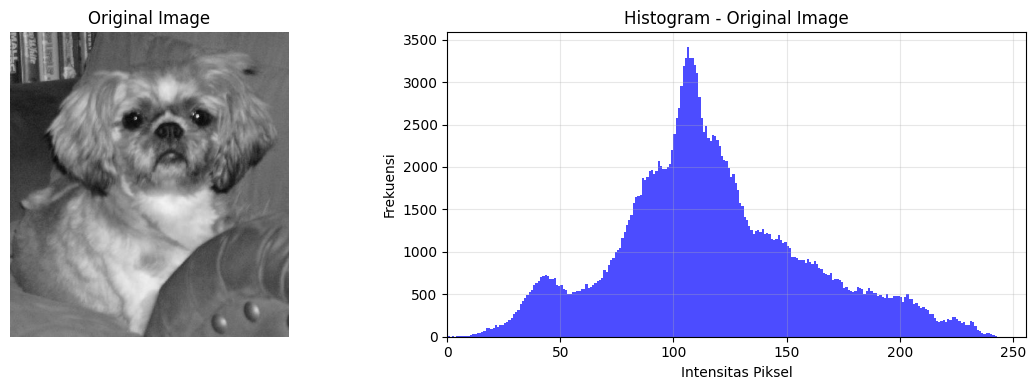

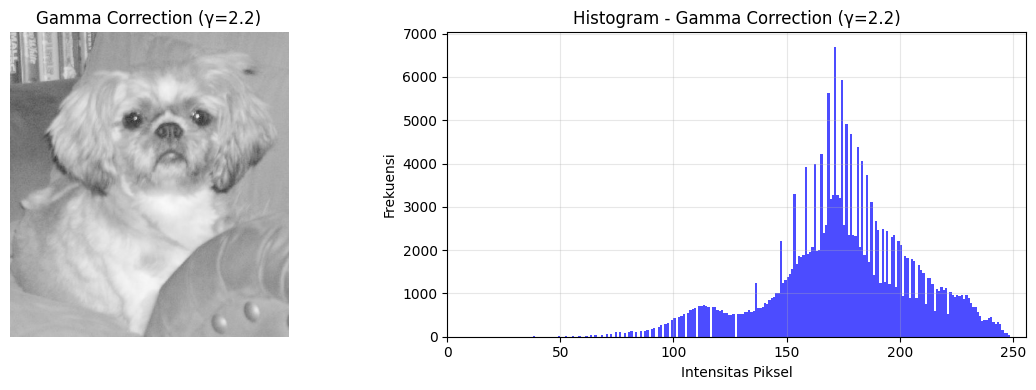

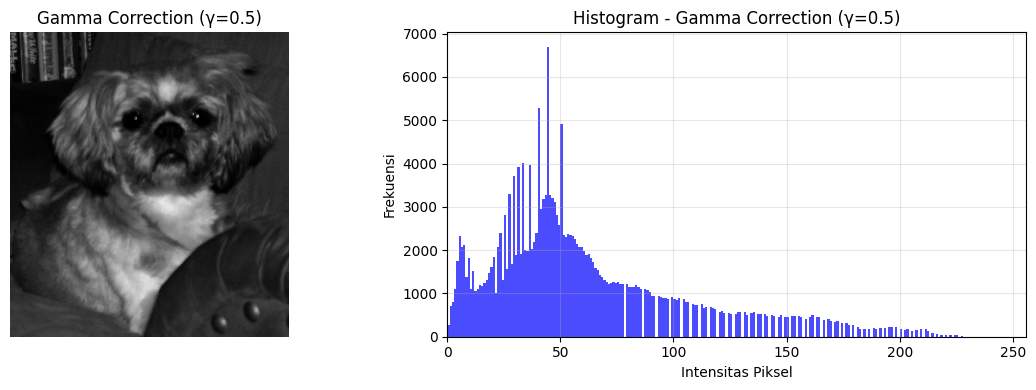

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_histogram(img, title):
    """Menampilkan gambar beserta histogramnya"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Tampilkan gambar
    ax1.imshow(img, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')
    
    # Tampilkan histogram
    ax2.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    ax2.set_title(f'Histogram - {title}')
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i/255.0)**invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

# Gamma correction
gamma_dark = gamma_correction(img_gray, 2.2)   # gamma > 1 darkens
gamma_light = gamma_correction(img_gray, 0.5)  # gamma < 1 brightens

# Tampilkan dengan histogram
show_image_with_histogram(img_gray, "Original Image")
show_image_with_histogram(gamma_dark, "Gamma Correction (γ=2.2)")
show_image_with_histogram(gamma_light, "Gamma Correction (γ=0.5)")

# Analisis Histogram pada Gamma Correction

## Apa Itu Gamma Correction?

Gamma correction adalah metode untuk mengubah brightness gambar menggunakan fungsi non-linear. Berbeda dengan brightness adjustment yang cuma menambah/mengurangi nilai konstan, gamma correction menggunakan fungsi pangkat (power function).

Formula-nya:
```
Output = (Input / 255)^(1/γ) × 255
```

Dimana γ (gamma) adalah parameter yang kita atur:
- **γ < 1** (misalnya 0.5): Gambar jadi lebih terang
- **γ = 1**: Tidak ada perubahan
- **γ > 1** (misalnya 2.2): Gambar jadi lebih gelap

## Mengapa Non-Linear Itu Penting?

**Perbedaan dengan Brightness Adjustment**

Brightness adjustment sederhana:
- Semua piksel ditambah/dikurangi nilai yang sama
- Linear: piksel 50 naik 30 jadi 80, piksel 200 juga naik 30 jadi 230
- Histogram bergeser tapi bentuknya tetap sama

Gamma correction:
- Setiap piksel diubah dengan proporsi yang berbeda
- Non-linear: piksel gelap berubah lebih drastis daripada piksel terang (atau sebaliknya)
- Histogram bergeser DAN bentuknya berubah

Ini seperti membengkokkan histogram, bukan cuma menggesernya.

## Transformation Curve: Kurva Lengkung

Kalau kita plot transformation function gamma correction, kita dapat kurva lengkung, bukan garis lurus:

**γ < 1 (misalnya 0.5) - Kurva Cembung ke Atas**
- Area gelap naik lebih banyak
- Area tengah naik sedang
- Area terang naik sedikit
- Kurva melengkung ke atas

**γ > 1 (misalnya 2.2) - Kurva Cekung ke Bawah**
- Area gelap turun banyak
- Area tengah turun sedang
- Area terang turun sedikit
- Kurva melengkung ke bawah

**γ = 1 - Garis Lurus Diagonal**
- Linear, tidak ada perubahan
- Output = Input

Yang penting: Ujung-ujung kurva selalu menempel di titik (0,0) dan (255,255). Artinya:
- Piksel hitam (0) tetap hitam (0)
- Piksel putih (255) tetap putih (255)
- Tidak ada clipping di ujung!

## Analisis Histogram: Gamma Light (γ=0.5)

**Perubahan pada Histogram**

Ketika γ < 1 (misalnya 0.5), histogram bergeser ke kanan (lebih terang), tapi tidak uniform:

**Area Gelap (0-100):**
- Naik paling drastis
- Piksel dengan nilai 50 bisa naik jadi 150-an
- Di histogram, area kiri jadi lebih kosong

**Area Tengah (100-150):**
- Naik sedang
- Piksel 128 mungkin naik jadi 180-190
- Ini adalah "sweet spot" dari gamma correction

**Area Terang (150-255):**
- Naik sedikit saja
- Piksel 200 mungkin cuma naik jadi 220-230
- Di histogram, area kanan jadi lebih padat

**Bentuk Histogram Berubah**

Yang paling menarik: histogram tidak hanya bergeser, tapi bentuknya juga berubah. Kalau histogram original punya puncak di nilai 80, setelah gamma light puncaknya mungkin di 160 dan bentuknya lebih melebar ke kanan.

**Efek Visual**

- Gambar jadi lebih cerah
- Shadow (area gelap) jadi lebih terlihat - ini yang paling kentara
- Detail di area gelap yang tadinya susah dilihat jadi lebih jelas
- Area terang tidak terlalu over-exposed
- Gambar terlihat lebih "lifted" tapi natural

**Kapan Berguna?**

- Gambar underexposed (terlalu gelap)
- Foto di tempat gelap
- Memperbaiki shadow tanpa merusak highlight
- Gaming monitors (sering pakai gamma rendah supaya lebih terang)

## Analisis Histogram: Gamma Dark (γ=2.2)

**Perubahan pada Histogram**

Ketika γ > 1 (misalnya 2.2), histogram bergeser ke kiri (lebih gelap), dengan pola kebalikan dari gamma light:

**Area Gelap (0-100):**
- Turun paling drastis
- Piksel 50 bisa turun jadi 10-20
- Area gelap jadi makin gelap (crushed shadows)

**Area Tengah (100-150):**
- Turun sedang
- Piksel 128 mungkin turun jadi 70-80
- Midtones jadi lebih gelap

**Area Terang (150-255):**
- Turun sedikit
- Piksel 200 mungkin turun jadi 170-180
- Highlight relatif terjaga

**Bentuk Histogram Berubah**

Histogram bergeser ke kiri dan "terkompresi". Kalau histogram original spread dari 50-200, setelah gamma dark mungkin jadi 10-170. Bentuknya juga berubah - puncak histogram bergeser ke area yang lebih gelap.

**Efek Visual**

- Gambar jadi lebih gelap
- Kontras meningkat (subjectively)
- Shadow jadi lebih dalam dan dramatis
- Highlight masih terlihat bagus
- Gambar terlihat lebih "moody" atau cinematic

**Kapan Berguna?**

- Gambar overexposed (terlalu terang)
- Foto yang washed out
- Efek dramatis/cinematic
- Print preparation (printer sering butuh gamma adjustment)
- Standard untuk display (sRGB menggunakan gamma 2.2)

## Perbandingan Histogram: Original vs Gamma

**Mean (Rata-rata) Berubah Signifikan**

- Original: misalnya mean = 120
- Gamma light (0.5): mean naik jadi ~160
- Gamma dark (2.2): mean turun jadi ~70

Perubahan mean lebih besar dibanding brightness adjustment sederhana dengan nilai yang comparable.

**Standard Deviation (Kontras) Juga Berubah**

Ini yang membedakan gamma dari brightness adjustment:

- Gamma light: StdDev biasanya berkurang (kontras berkurang sedikit)
- Gamma dark: StdDev bisa naik atau turun tergantung distribusi original

Kenapa? Karena transformasinya non-linear. Piksel-piksel yang tadinya berdekatan bisa jadi lebih berjauhan atau lebih berdekatan setelah gamma correction.

**Range (Rentang) Tetap 0-255**

Meskipun histogram berubah bentuk, range tetap sama. Tidak ada clipping di ujung karena:
- 0^(1/γ) = 0
- 1^(1/γ) = 1

Jadi hitam tetap hitam, putih tetap putih. Ini advantage besar dibanding brightness/contrast adjustment yang sering clipping.

## Kenapa Histogram Berubah Bentuk?

**Konsep "Stretching" dan "Compressing"**

Bayangkan histogram seperti karet gelang:

**Gamma < 1:**
- Area gelap di-"stretch" (ditarik/diperlebar)
- Area terang di-"compress" (ditekan/dirapatkan)
- Hasilnya: histogram condong ke kanan

**Gamma > 1:**
- Area gelap di-"compress" (dirapatkan)
- Area terang di-"stretch" (diperlebar)
- Hasilnya: histogram condong ke kiri

Ini bukan cuma geser, tapi benar-benar mengubah proporsi dan bentuk distribusi.

## Kesimpulan

Gamma correction adalah operasi yang sangat powerful untuk brightness adjustment karena sifatnya yang non-linear:

**Yang Terjadi pada Histogram:**
- Histogram bergeser (seperti brightness adjustment)
- Tapi juga berubah bentuk (berbeda dari brightness adjustment)
- Tidak ada clipping di ujung (advantage besar)
- Mean berubah signifikan
- Standard deviation juga bisa berubah

**Gamma Light (γ < 1):**
- Histogram condong ke kanan
- Shadow detail meningkat drastis
- Bagus untuk gambar gelap
- Natural dan tidak over-processed

**Gamma Dark (γ > 1):**
- Histogram condong ke kiri
- Dramatic dan cinematic look
- Bagus untuk gambar terang
- Standard untuk display (gamma 2.2)

**Keunggulan Utama:**
- ✓ No clipping
- ✓ Natural results
- ✓ Shadow/highlight control yang bagus
- ✓ Sesuai dengan persepsi mata manusia

**Kapan Pakai:**
- Untuk brightness correction yang lebih natural
- Saat ingin preserve detail di shadow atau highlight
- Untuk color grading dan tone adjustment
- Display calibration

Dari perspektif histogram, gamma correction adalah salah satu operasi paling "elegant" - mengubah distribusi intensitas dengan cara yang smooth dan natural tanpa kehilangan informasi di ujung-ujung range.